In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

In [2]:
def DADOS(url:str,n_rodadas):
    # Pega o DF e faz a media para as categorias que são cabiveis de tal ação.
    df = pd.read_csv(url,sep = ';')
    df = df.drop(['VCasa',"ECasa","DCasa","GPCasa","GCCasa",
                  "PtCasa","VFora","EFora","DFora","GPFora",
                  "GCFora","PtFora"],axis=1)
    df.iloc[:,4:37]=df.iloc[:,4:37]/n_rodadas
    df.iloc[:,2]=df.iloc[:,2]/10
    return df

In [3]:
df19 = DADOS('.\Dados\dados2019.csv',38)

In [4]:
scaler = MaxAbsScaler().fit(df19.iloc[:,1:37])

In [5]:
a = scaler.transform(df19.iloc[:,1:37])

In [6]:
df191 = df19
df191.iloc[:,1:37]=a

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
def reduzir(df,coluna,theta):
    #Pega as colunas mais importantes para os dados...
    model = RandomForestRegressor(random_state=1, max_depth=10)
    model.fit(a,df.loc[:,coluna])
    features = df.columns[1:37]
    importances = model.feature_importances_
    indices = np.argsort(importances) #[0:9])  # top 10 features
    plt.figure(figsize=(12,10))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.xmin = [0.01]
    plt.show()
    new_model = SelectFromModel(model,threshold=theta)
    fit = new_model.fit_transform(a, df.loc[:,coluna])
    new_model.get_support()
    selected_columns = np.array(df.columns[1:37])[new_model.get_support()]
    df3 = df[selected_columns]
    pd.options.mode.chained_assignment = None
    df3[coluna] = df[coluna]
    return df3

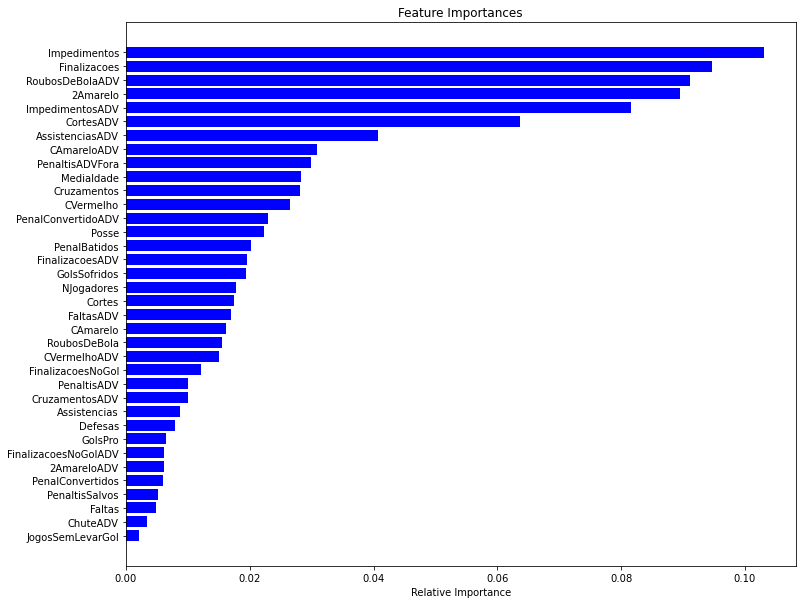

,NJogadores,MediaIdade,Posse,GolsPro,Assistencias,PenalConvertidos,PenalBatidos,CAmarelo,CVermelho,GolsSofridos,...,Cruzamentos,Cortes,RoubosDeBola,2AmareloADV,FaltasADV,ImpedimentosADV,CruzamentosADV,CortesADV,RoubosDeBolaADV,E
0,0.729167,0.921233,0.820000,0.677419,0.769231,0.333333,0.555556,0.581197,0.111111,0.603774,...,0.739312,0.928315,0.858333,0.250,0.888591,0.922222,0.765060,1.000000,0.868889,10
1,0.583333,0.900685,0.813333,0.693548,0.717949,0.333333,0.666667,0.769231,0.222222,0.528302,...,0.909281,0.718638,0.920833,0.250,0.852349,0.555556,0.771084,0.830266,0.873333,17
2,0.562500,0.910959,0.821667,0.596774,0.564103,0.666667,0.555556,0.726496,0.555556,0.698113,...,0.748697,0.709677,0.866667,0.000,0.832215,0.377778,0.762651,0.811861,0.888889,11
3,0.666667,0.938356,1.000000,1.000000,1.000000,0.833333,0.666667,0.675214,0.777778,0.509434,...,0.892596,0.646953,0.856250,0.375,0.738255,0.900000,0.701205,0.920245,0.831111,9
4,0.687500,1.000000,0.751667,0.467742,0.435897,0.333333,0.222222,0.914530,0.333333,0.849057,...,0.601668,0.887097,0.841667,0.250,0.888591,0.700000,0.936145,0.865031,0.960000,11
5,0.812500,0.931507,0.760000,0.709677,0.794872,0.333333,0.222222,0.760684,0.666667,0.811321,...,0.628780,0.632616,0.797917,0.875,0.813423,0.555556,1.000000,0.732106,0.960000,10
6,0.833333,0.890411,0.828333,0.741935,0.948718,0.500000,0.555556,0.897436,0.444444,0.641509,...,0.720542,0.623656,0.883333,0.500,0.758389,0.522222,0.959036,0.858896,0.968889,12
7,0.687500,0.955479,0.888333,0.467742,0.512821,0.500000,0.333333,0.931624,0.888889,0.679245,...,1.000000,0.731183,0.766667,1.000,0.832215,0.644444,0.804819,0.840491,0.917778,15
8,0.812500,0.969178,0.806667,0.629032,0.641026,0.833333,1.000000,0.717949,0.333333,0.754717,...,0.773723,0.634409,0.841667,0.000,0.727517,0.600000,0.837349,0.807771,0.913333,13
9,0.916667,0.938356,0.848333,0.500000,0.564103,0.166667,0.333333,0.735043,0.444444,0.603774,...,0.656934,0.675627,0.768750,0.500,0.951678,0.533333,0.768675,0.777096,0.817778,20


In [8]:
reduzir(df191,'E',0.005)

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression , Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
def print_models(X,Y):
    validation_size = 0.2
    seed = 0
    X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
    num_folds = 5
    score = 'r2'
    models = []
    models.append(('LR', LinearRegression()))
    models.append(('LASSO', Lasso(random_state=seed)))
    models.append(('EN', ElasticNet(random_state=seed)))
    models.append(('KNN', KNeighborsRegressor()))
    models.append(('CART', DecisionTreeRegressor(random_state=seed)))
    models.append(('SVR', SVR()))
    models.append(('RIDGE', Ridge(random_state=seed)))
    models.append(('RIDGECV', RidgeCV()))
    models.append(('MLPR', MLPRegressor(random_state=seed)))
    models.append(('GPR', GaussianProcessRegressor(random_state=seed)))
    models.append(('AB', AdaBoostRegressor(random_state=seed)))
    models.append(('RF', RandomForestRegressor(random_state=seed)))
    models.append(('ET', ExtraTreesRegressor(random_state=seed)))
    models.append(('GBM', GradientBoostingRegressor(random_state=seed)))
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

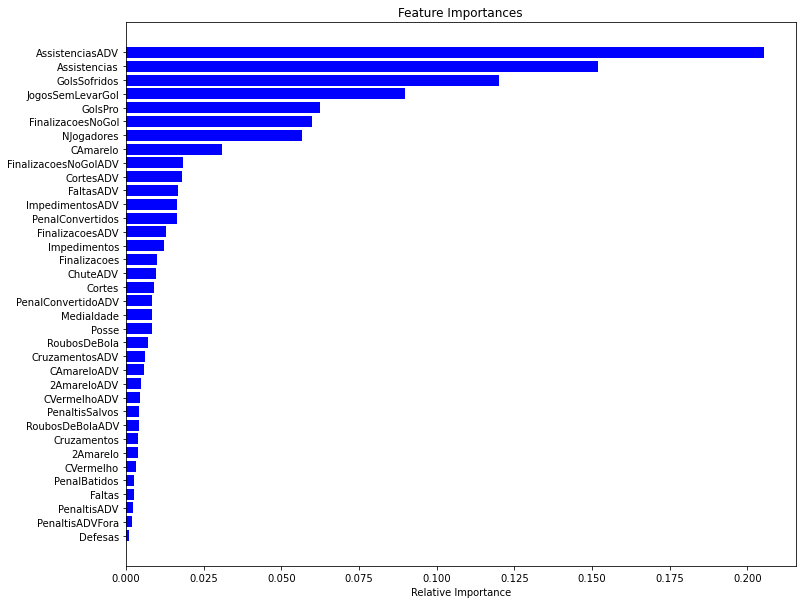

In [10]:
df3 = reduzir(df191,'Pt',0.005)

In [11]:
#Dados e Target
X = df3.values[:,0:-1]
Y = df3.values[:,-1]

In [12]:
print_models(X,Y)

LR: 0.490929 (0.545718)
LASSO: 0.279983 (0.451878)
EN: -0.136922 (0.353810)
KNN: 0.397125 (0.193317)
CART: -3.767811 (3.555549)
SVR: -0.122077 (0.271119)
RIDGE: 0.399302 (0.246548)
RIDGECV: 0.649751 (0.138051)


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPR: -0.369298 (0.379078)
GPR: 0.244619 (0.521799)
AB: 0.259451 (0.232820)
RF: 0.112877 (0.433459)
ET: 0.086972 (0.656321)
GBM: -1.014239 (1.076546)


### RIDGE is the BEST!!!

In [13]:
Pontos = Ridge(random_state=0).fit(X,Y)
np.around(Pontos.predict(X),0)

array([58., 59., 52., 69., 43., 51., 59., 46., 55., 46., 47., 39., 45.,
       49., 52., 49., 60., 44., 45., 45.])

In [14]:
df20 = DADOS('.\Dados\dados2020.csv',38)
df20.iloc[:,1:37] = scaler.transform(df20.iloc[:,1:37])
i = df20[df3.columns]
prev = np.around(Pontos.predict(i.values[:,0:-1]),0)

In [15]:
r = pd.DataFrame()
r['e']= df20.Equipe
r['ptsprev']= prev
r['pts'] = i.Pt

r=r.sort_values('ptsprev', ascending=False)
r['i']=range(1,21)
r

,e,ptsprev,pts,i
6,Chapecoense,60.0,73,1
0,América (MG),58.0,73,2
8,Cruzeiro,55.0,49,3
9,Cuiabá,55.0,61,4
12,Juventude,54.0,61,5
4,CRB,53.0,52,6
5,CSA,53.0,58,7
15,Operário,53.0,57,8
18,Sampaio Corrêa,52.0,57,9
17,Ponte Preta,51.0,57,10


In [16]:
df21 = DADOS('.\Dados\\ate33.csv',38)
df21.iloc[:,1:37] = scaler.transform(df21.iloc[:,1:37])
i = df21[df3.columns]
prev = np.around(Pontos.predict(i.values[:,0:-1]),0)

In [17]:
r = pd.DataFrame()
r['e']= df21.Equipe
r['ptsprev']= prev
r['pts'] = i.Pt
r['i']=range(1,21)

r=r.sort_values('ptsprev', ascending=False)
r['i']=range(1,21)
r

,e,ptsprev,pts,i
1,Botafogo (RJ),61.0,59,1
0,Avaí,55.0,56,2
4,CRB,55.0,54,3
7,Coritiba,55.0,61,4
10,Guarani,55.0,52,5
9,Goiás,54.0,54,6
12,Náutico,52.0,45,7
17,Vasco da Gama,51.0,47,8
5,CSA,50.0,51,9
19,Vitória,50.0,33,10


In [27]:
def tablePT(url1:str,url2:str,n_rodadas:int,var_prever:str,theta:float):
    treino = DADOS(url1,38)
    teste = DADOS(url2,n_rodadas)
    scaler = MaxAbsScaler().fit(treino.iloc[:,1:37])
    a = scaler.transform(treino.iloc[:,1:37])
    treino.iloc[:,1:37]=a
    reduzido = reduzir(treino,var_prever,theta)
    X = reduzido.values[:,0:-1]
    Y = reduzido.values[:,-1]
    modelo = Ridge(random_state=0).fit(X,Y)
    teste.iloc[:,1:37] = scaler.transform(teste.iloc[:,1:37])
    prev = modelo.predict(teste[reduzido.columns].values[:,0:-1])
    r = pd.DataFrame()
    r['Equipe']= teste.Equipe
    r['Pontos Previsto']= prev
    r['Pontos'] = teste.Pt
    r=r.sort_values('Pontos Previsto', ascending=False)
    r['Indice Previsão']=range(1,21)
    r['Classificação Real']= teste.Posicao
    return(r)

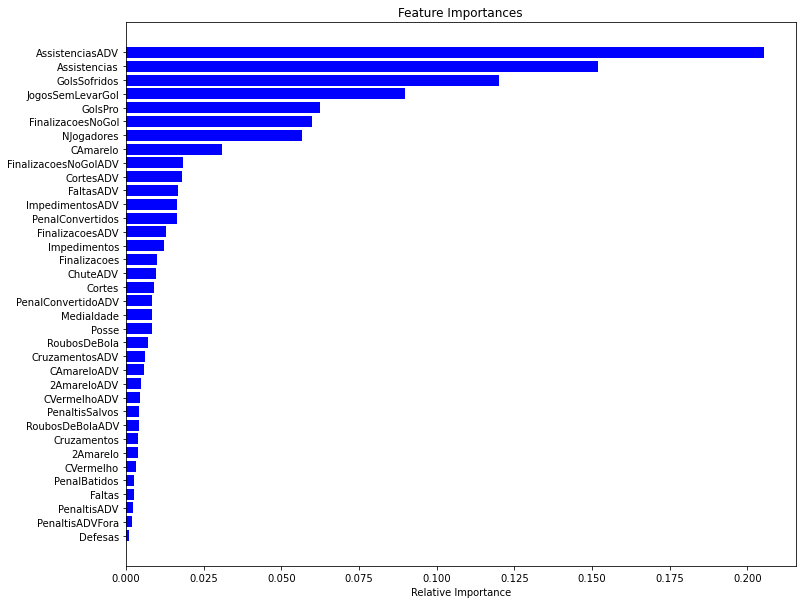

,Pontos Previsto,Pontos,Indice Previsão,Classificação Real,diff
Equipe,,,,,
Chapecoense,59.752650,73,1,1,0
América (MG),57.749367,73,2,2,0
Cuiabá,55.081638,61,3,4,1
Cruzeiro,54.877740,49,4,11,7
Juventude,53.697541,61,5,3,2
CSA,53.383473,58,6,5,1
Operário,52.698442,57,7,8,1
CRB,52.541235,52,8,10,2
Sampaio Corrêa,51.617792,57,9,6,3


In [34]:
tablePT('.\Dados\dados2019.csv','.\Dados\dados2020.csv',38,'Pt',0.005)

In [67]:
def tableVED(url1:str,url2:str,n_rodadas:int):
    treino = DADOS(url1,38)
    teste = DADOS(url2,n_rodadas)
    scaler = MaxAbsScaler().fit(treino.iloc[:,1:37])
    a = scaler.transform(treino.iloc[:,1:37])
    treino.iloc[:,1:37]=a
    teste.iloc[:,1:37] = scaler.transform(teste.iloc[:,1:37])
    dfV = reduzir(treino,'V',0.05)
    dfE = reduzir(treino,'E',0.005)
    dfD = reduzir(treino,'D',0.05)
    Xv = dfV.values[:,0:-1]
    Yv = dfV.values[:,-1]
    Xe = dfE.values[:,0:-1]
    Ye = dfE.values[:,-1]
    Xd = dfD.values[:,0:-1]
    Yd = dfD.values[:,-1]
    V = RidgeCV().fit(Xv,Yv)
    E = RidgeCV().fit(Xe,Ye)
    D = RidgeCV().fit(Xd,Yd)
    v = teste[dfV.columns]
    vprev = V.predict(v.values[:,0:-1])
    e = teste[dfE.columns]
    eprev = E.predict(e.values[:,0:-1])
    d = teste[dfD.columns]
    dprev = D.predict(d.values[:,0:-1])
    w = pd.DataFrame()
    w['Equipe'] = teste.Equipe
    w['VP'] = vprev
    w['EP'] = eprev
    w['DP'] = dprev
    w['soma'] = w.VP+w.EP+w.DP
    #w.VP = np.round(w.VP/w.soma*38)
    #w.EP = np.round(w.EP/w.soma*38)
    #w.DP = np.round(w.DP/w.soma*38)
    #w['soma'] = w.VP+w.EP+w.DP
    #w.EP[w.soma == 37] = w.EP +1 
    #w.EP[w.soma == 39] = w.EP -1 
    #w['soma'] = w.VP+w.EP+w.DP
    #w['PP'] = w.VP * 3 + w.EP
    #w['pontos'] = df20.Pt
    #=w.sort_values('PP', ascending=False)
    #w['i']=range(1,21)
    #w['c']=teste.Posicao
    return(w)

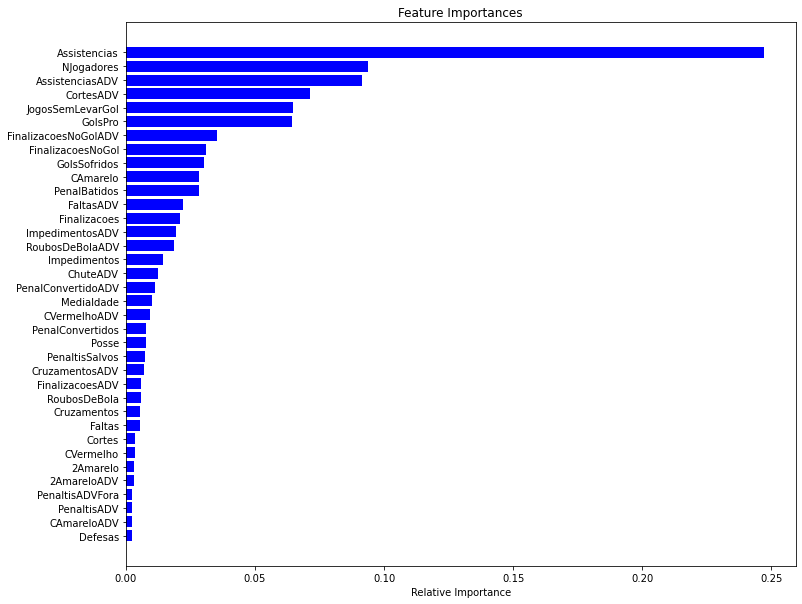

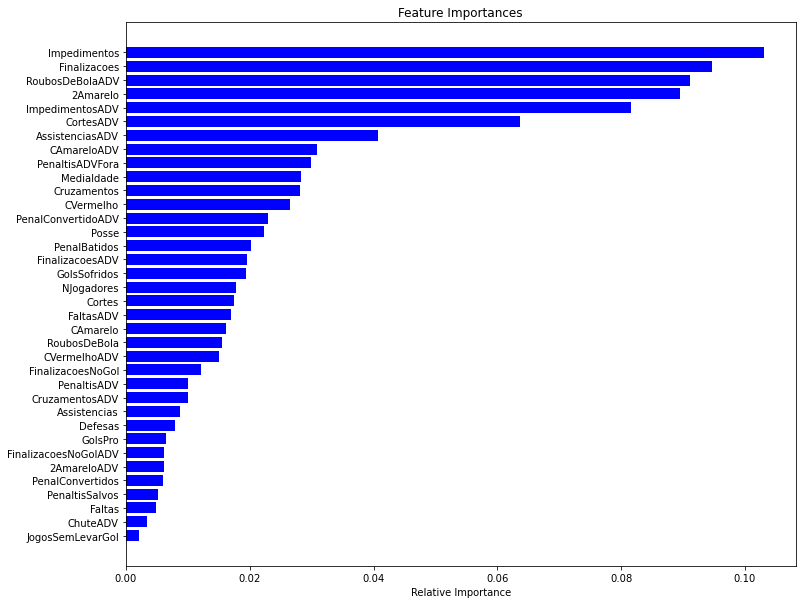

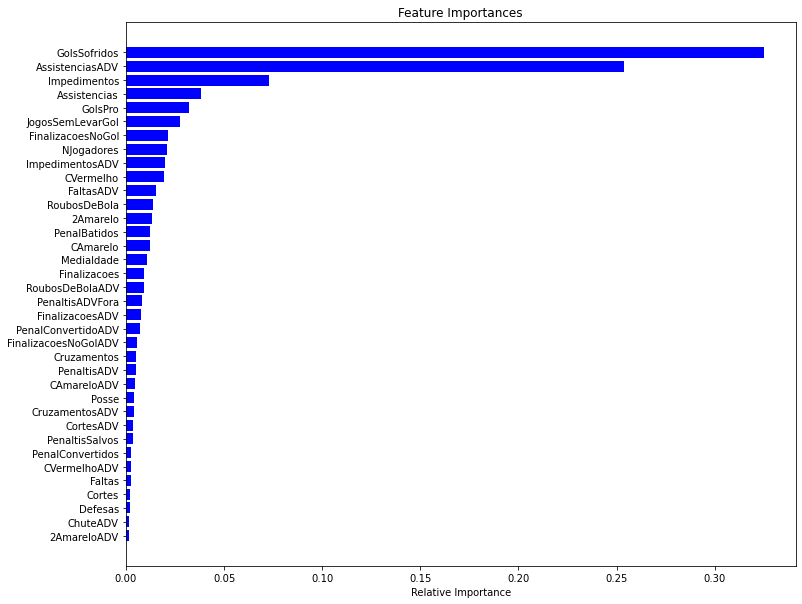

,Equipe,VP,EP,DP,soma
0,América (MG),15.032441,13.503041,3.342045,31.877527
1,Avaí,11.865595,13.147654,17.668333,42.681582
2,Botafogo (SP),7.450561,13.089158,11.774599,32.314318
3,Brasil de Pelotas,10.870449,12.950334,7.040997,30.861780
4,CRB,14.349273,12.493952,15.283370,42.126594
5,CSA,13.327031,12.658241,11.580206,37.565478
6,Chapecoense,18.484804,13.092399,4.351278,35.928481
7,Confiança,11.408538,11.967541,16.651774,40.027852
8,Cruzeiro,14.211421,12.972374,9.946948,37.130743
9,Cuiabá,17.348928,12.506974,10.772537,40.628439


In [68]:
tableVED('.\Dados\dados2019.csv','.\Dados\dados2020.csv',38)

In [41]:
14/20

0.7

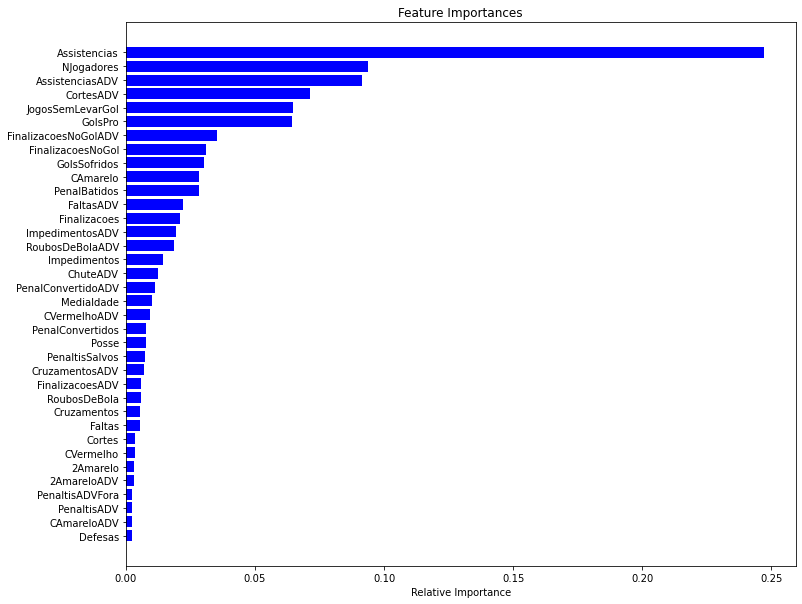

In [42]:
dfV = reduzir(df191,'V',0.05)

In [43]:
X = dfV.values[:,0:-1]
Y = dfV.values[:,-1]
print_models(X,Y)

LR: -0.029125 (0.636328)
LASSO: -0.570993 (0.684209)
EN: -0.562820 (0.689885)
KNN: 0.181726 (0.318217)
CART: 0.064934 (0.740950)
SVR: -0.127452 (0.416654)
RIDGE: 0.081720 (0.511964)
RIDGECV: 0.337676 (0.323616)


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPR: -0.054813 (0.361688)
GPR: -0.310014 (1.124827)
AB: 0.407144 (0.325845)
RF: 0.188658 (0.307739)
ET: 0.299890 (0.492080)
GBM: 0.234848 (0.624196)


In [44]:
V = RidgeCV().fit(X,Y)

In [45]:
np.around(V.predict(X))

array([17., 16., 14., 20., 10., 14., 16., 10., 12., 11., 10., 10., 11.,
       10., 13., 13., 17., 10.,  8., 11.])

In [46]:
Y

array([17., 15., 13., 22., 11., 15., 18.,  8., 13.,  7., 12., 11.,  8.,
       13., 14., 11., 17., 10.,  7., 11.])

In [47]:
i = df20[dfV.columns]
prev = np.around(V.predict(i.values[:,0:-1]),0)

In [48]:
r = pd.DataFrame()
r['e']= df20.Equipe
r['ptsprev']= prev
r['pts'] = i.V

r.sort_values('ptsprev', ascending=False)

,e,ptsprev,pts
6,Chapecoense,18.0,20
9,Cuiabá,17.0,17
12,Juventude,17.0,17
0,América (MG),15.0,20
18,Sampaio Corrêa,15.0,17
4,CRB,14.0,15
15,Operário,14.0,15
8,Cruzeiro,14.0,14
11,Guarani,13.0,13
17,Ponte Preta,13.0,16


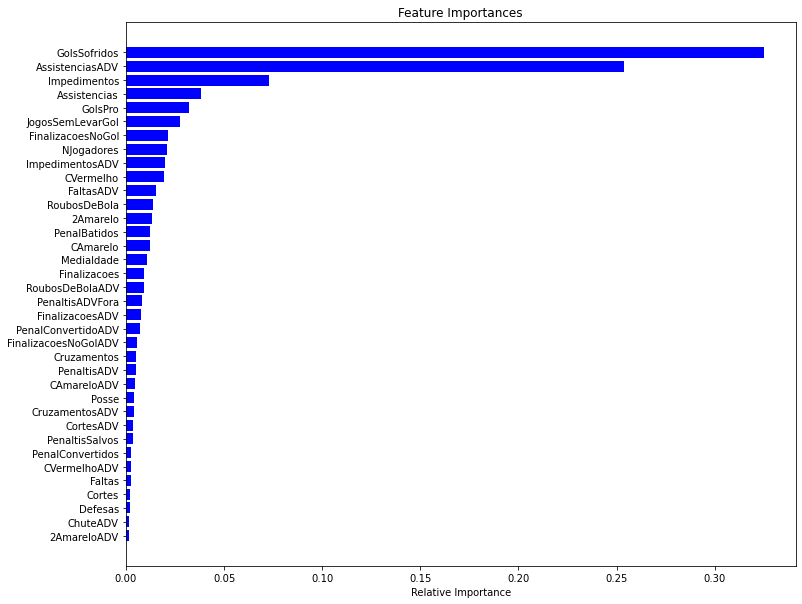

In [49]:
dfD = reduzir(df191,'D',0.05)

In [50]:
X = dfD.values[:,0:-1]
Y = dfD.values[:,-1]
print_models(X,Y)

LR: -0.272356 (1.790088)
LASSO: -0.651893 (0.642053)
EN: -0.621293 (0.618633)
KNN: 0.557883 (0.128196)
CART: -2.310538 (4.766332)
SVR: 0.265956 (0.255604)
RIDGE: 0.299034 (0.247982)
RIDGECV: 0.449295 (0.442635)


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPR: -4.090475 (4.178703)
GPR: -10.979045 (10.207853)
AB: -0.819090 (2.112899)
RF: -0.428584 (1.402107)
ET: 0.438600 (0.326106)
GBM: -0.252145 (1.165499)


In [51]:
D = KNeighborsRegressor().fit(X,Y)
D = RidgeCV().fit(X,Y)

In [52]:
i = df20[dfD.columns]
prev = np.around(D.predict(i.values[:,0:-1]),0)

In [53]:
r = pd.DataFrame()
r['e']= df20.Equipe
r['ptsprev']= prev
r['pts'] = i.D

r.sort_values('ptsprev', ascending=False)

,e,ptsprev,pts
16,Paraná,19.0,19
14,Oeste,18.0,23
1,Avaí,18.0,15
7,Confiança,17.0,16
17,Ponte Preta,16.0,13
11,Guarani,16.0,16
10,Figueirense,15.0,17
4,CRB,15.0,16
13,Náutico,13.0,14
2,Botafogo (SP),12.0,20


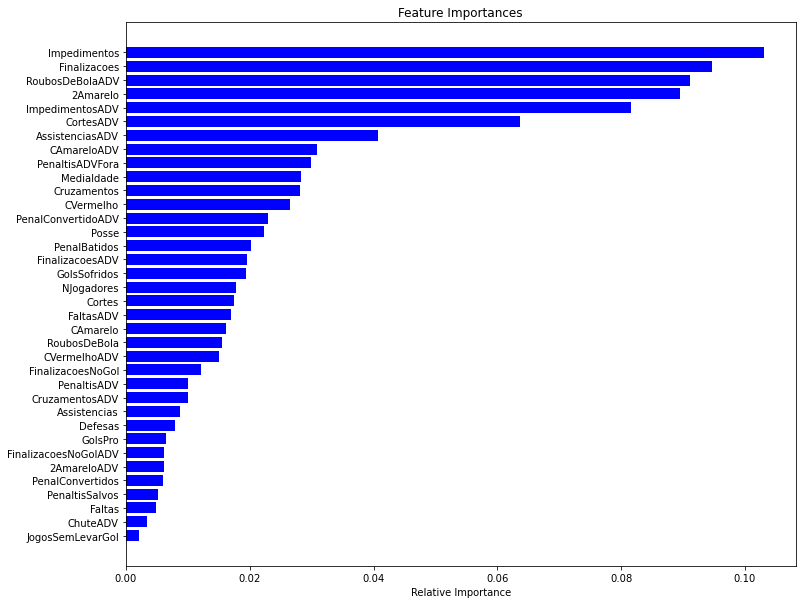

In [54]:
dfE = reduzir(df191,'E',0.05)

In [55]:
X = dfE.values[:,0:-1]
Y = dfE.values[:,-1]
print_models(X,Y)

LR: -20.095856 (36.909744)
LASSO: -4.437946 (5.241715)
EN: -4.300995 (5.045121)
KNN: -7.608270 (13.535131)
CART: -6.635752 (4.669026)
SVR: -2.937230 (3.873877)
RIDGE: -4.648511 (7.147595)
RIDGECV: -9.017385 (15.521817)


C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carlo\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLPR: -3.682066 (2.885271)
GPR: -63.762655 (112.997783)
AB: -8.372292 (14.102518)
RF: -7.695573 (13.215717)
ET: -5.191969 (7.370015)
GBM: -9.646674 (14.417718)


In [56]:
E = RidgeCV().fit(X,Y)

In [57]:
i = df20[dfE.columns]
prev = np.around(E.predict(i.values[:,0:-1]),0)

In [58]:
r = pd.DataFrame()
r['e']= df20.Equipe
r['ptsprev']= prev
r['pts'] = i.E
r['q']=abs(r['pts']-r['ptsprev'])

r.sort_values('q', ascending=False)
#r.sum()

,e,ptsprev,pts,q
1,Avaí,15.0,7,8.0
14,Oeste,15.0,8,7.0
4,CRB,14.0,7,7.0
18,Sampaio Corrêa,12.0,6,6.0
17,Ponte Preta,13.0,9,4.0
12,Juventude,14.0,10,4.0
2,Botafogo (SP),13.0,10,3.0
3,Brasil de Pelotas,13.0,16,3.0
5,CSA,13.0,10,3.0
16,Paraná,13.0,10,3.0


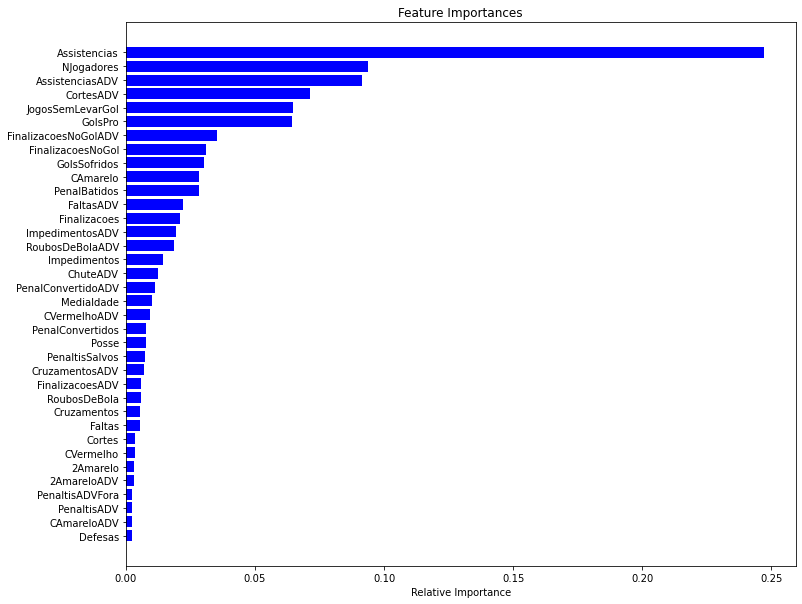

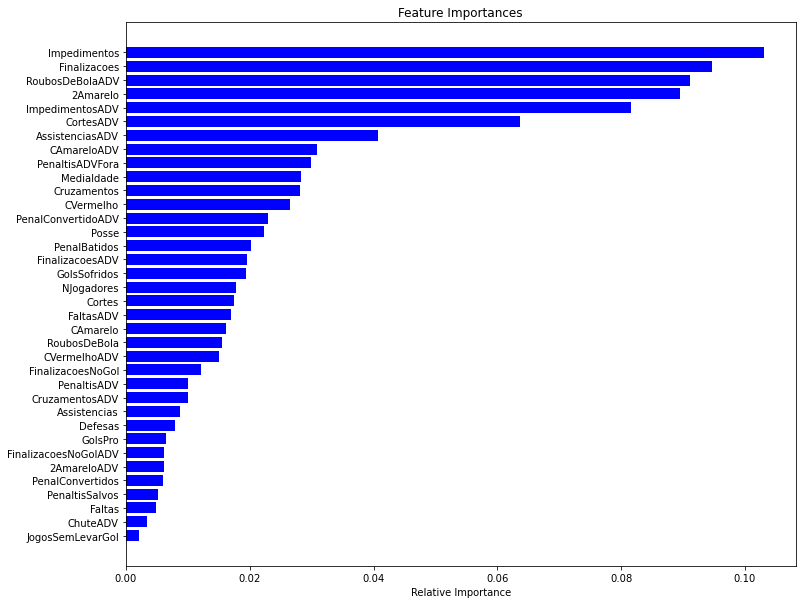

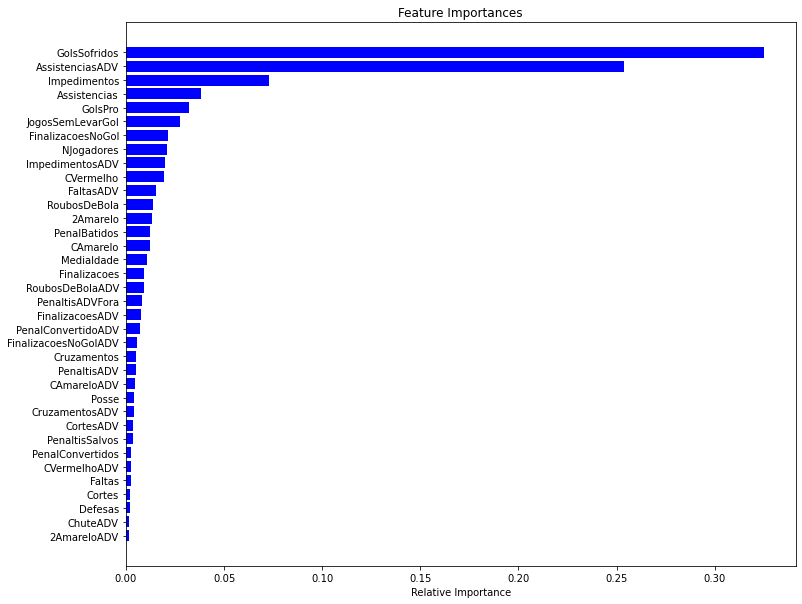

In [59]:
dfV = reduzir(df191,'V',0.05)
dfE = reduzir(df191,'E',0.005)
dfD = reduzir(df191,'D',0.05)
Xv = dfV.values[:,0:-1]
Yv = dfV.values[:,-1]
Xe = dfE.values[:,0:-1]
Ye = dfE.values[:,-1]
Xd = dfD.values[:,0:-1]
Yd = dfD.values[:,-1]

In [60]:
V = RidgeCV().fit(Xv,Yv)
E = RidgeCV().fit(Xe,Ye)
D = RidgeCV().fit(Xd,Yd)

In [61]:
v = df20[dfV.columns]
vprev = V.predict(v.values[:,0:-1])
e = df20[dfE.columns]
eprev = E.predict(e.values[:,0:-1])
d = df20[dfD.columns]
dprev = D.predict(d.values[:,0:-1])

In [62]:
w = pd.DataFrame()
w['Equipe'] = df20.Equipe
w['VP'] = vprev
w['EP'] = eprev
w['DP'] = dprev
w['soma'] = w.VP+w.EP+w.DP
w

,Equipe,VP,EP,DP,soma
0,América (MG),15.032441,13.503041,3.342045,31.877527
1,Avaí,11.865595,13.147654,17.668333,42.681582
2,Botafogo (SP),7.450561,13.089158,11.774599,32.314318
3,Brasil de Pelotas,10.870449,12.950334,7.040997,30.861780
4,CRB,14.349273,12.493952,15.283370,42.126594
5,CSA,13.327031,12.658241,11.580206,37.565478
6,Chapecoense,18.484804,13.092399,4.351278,35.928481
7,Confiança,11.408538,11.967541,16.651774,40.027852
8,Cruzeiro,14.211421,12.972374,9.946948,37.130743
9,Cuiabá,17.348928,12.506974,10.772537,40.628439


In [63]:
w.VP = np.round(w.VP/w.soma*38)
w.EP = np.round(w.EP/w.soma*38)
w.DP = np.round(w.DP/w.soma*38)
w['soma'] = w.VP+w.EP+w.DP

In [64]:
w

,Equipe,VP,EP,DP,soma
0,América (MG),18.0,16.0,4.0,38.0
1,Avaí,11.0,12.0,16.0,39.0
2,Botafogo (SP),9.0,15.0,14.0,38.0
3,Brasil de Pelotas,13.0,16.0,9.0,38.0
4,CRB,13.0,11.0,14.0,38.0
5,CSA,13.0,13.0,12.0,38.0
6,Chapecoense,20.0,14.0,5.0,39.0
7,Confiança,11.0,11.0,16.0,38.0
8,Cruzeiro,15.0,13.0,10.0,38.0
9,Cuiabá,16.0,12.0,10.0,38.0


In [65]:
w.EP[w.soma == 37] = w.EP +1 
w.EP[w.soma == 39] = w.EP -1 
w['soma'] = w.VP+w.EP+w.DP

In [66]:
#w['soma'] = w.VP+w.EP+w.DP
w['PP'] = w.VP * 3 + w.EP
w['pontos'] = df20.Pt

w=w.sort_values('PP', ascending=False)
w['i']=range(1,21)
w

,Equipe,VP,EP,DP,soma,PP,pontos,i
6,Chapecoense,20.0,13.0,5.0,38.0,73.0,73,1
0,América (MG),18.0,16.0,4.0,38.0,70.0,73,2
12,Juventude,16.0,12.0,10.0,38.0,60.0,61,3
9,Cuiabá,16.0,12.0,10.0,38.0,60.0,61,4
8,Cruzeiro,15.0,13.0,10.0,38.0,58.0,49,5
15,Operário,14.0,14.0,10.0,38.0,56.0,57,6
19,Vitória,14.0,13.0,11.0,38.0,55.0,48,7
3,Brasil de Pelotas,13.0,16.0,9.0,38.0,55.0,49,8
18,Sampaio Corrêa,14.0,12.0,12.0,38.0,54.0,57,9
5,CSA,13.0,13.0,12.0,38.0,52.0,58,10
